# Latihan Studi Kasus: Klasifikasi Pelanggan untuk Churn pada Perusahaan XYZ

## Langkah 1: Mengimpor Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Langkah 2: Memuat Data

In [3]:
data = pd.read_csv('churn_dataset_bmlp_3.csv')

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print("\nInformasi dataset: ")

data.info()


Informasi dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
print("\nMissing values per fitur: ")

# print(data.isna().sum())
data.isna().sum()


Missing values per fitur: 


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data = data.drop(columns=['RowNumber','CustomerId','Surname'])

In [7]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Langkah 3: Exploratory Data Analysis (EDA) 

### Distribusi fitur numerik

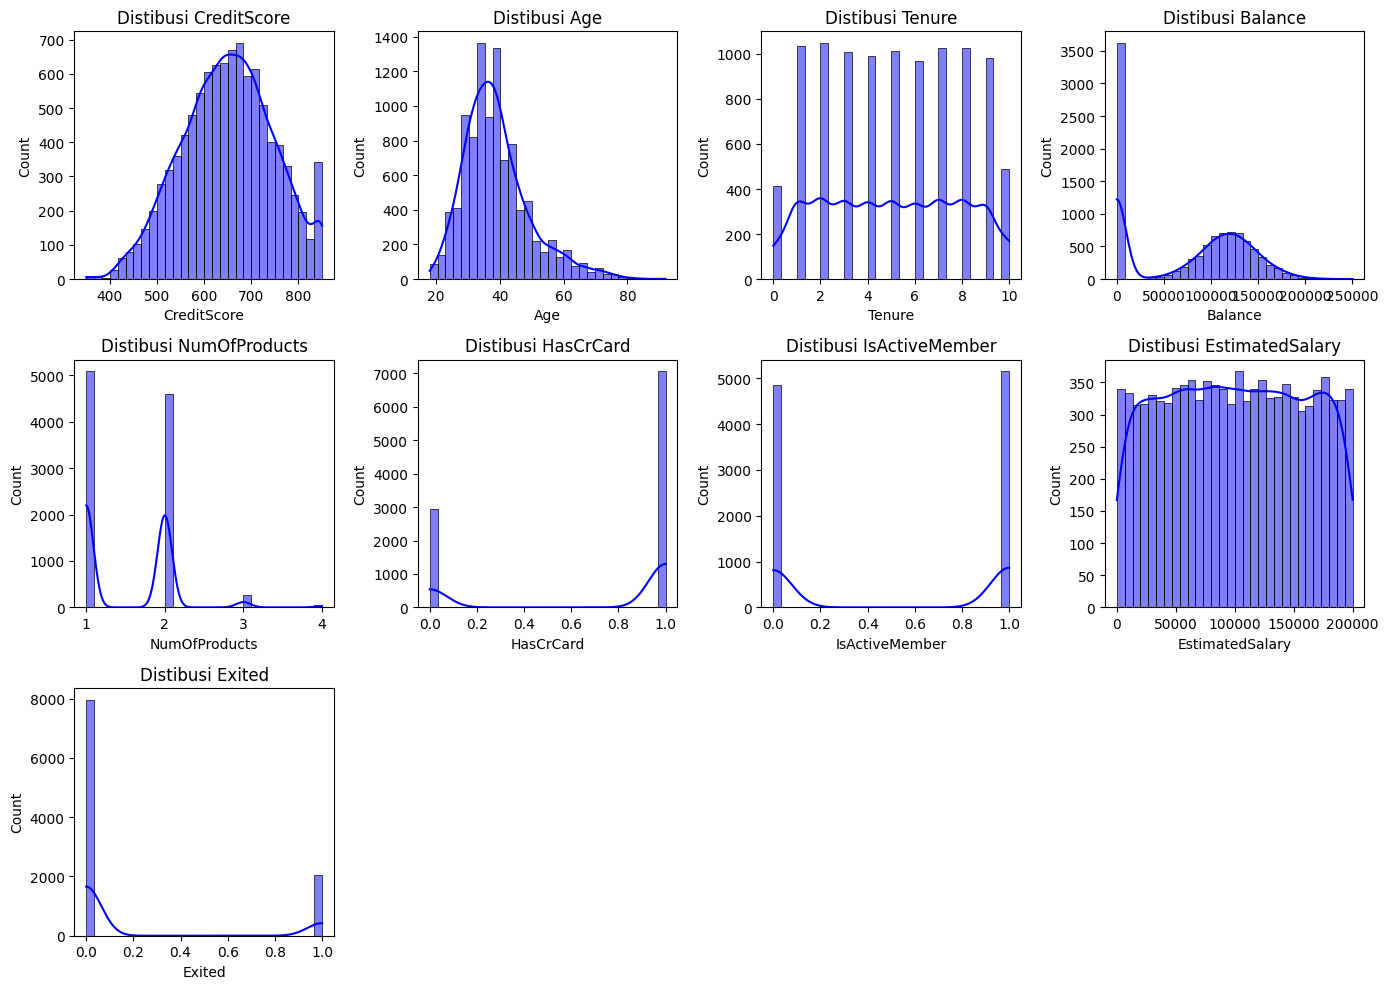

In [8]:
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14,10))

for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3,4,i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distibusi {column}')

plt.tight_layout()

plt.show()

### Distribusi fitur kategorikal

/tmp/ipykernel_7942/381102020.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')
/tmp/ipykernel_7942/381102020.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')


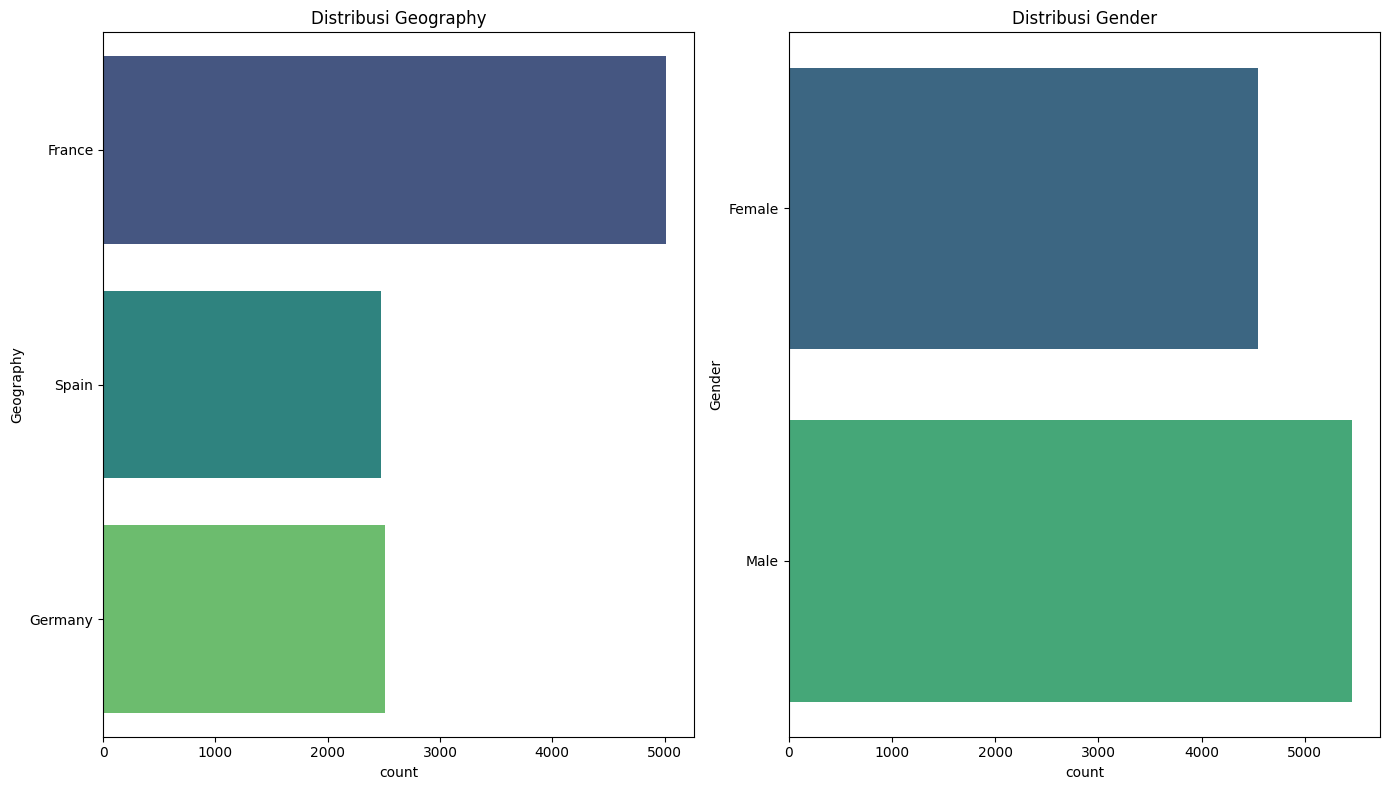

In [9]:
cat_features = data.select_dtypes(include=['object'])

# print(cat_features)

plt.figure(figsize=(14,8))

for i, column in enumerate(cat_features,1):
    plt.subplot(1,2,i)
    sns.countplot(y=data[column], palette='viridis')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

### Heatmap korelasi untuk fitur numerik

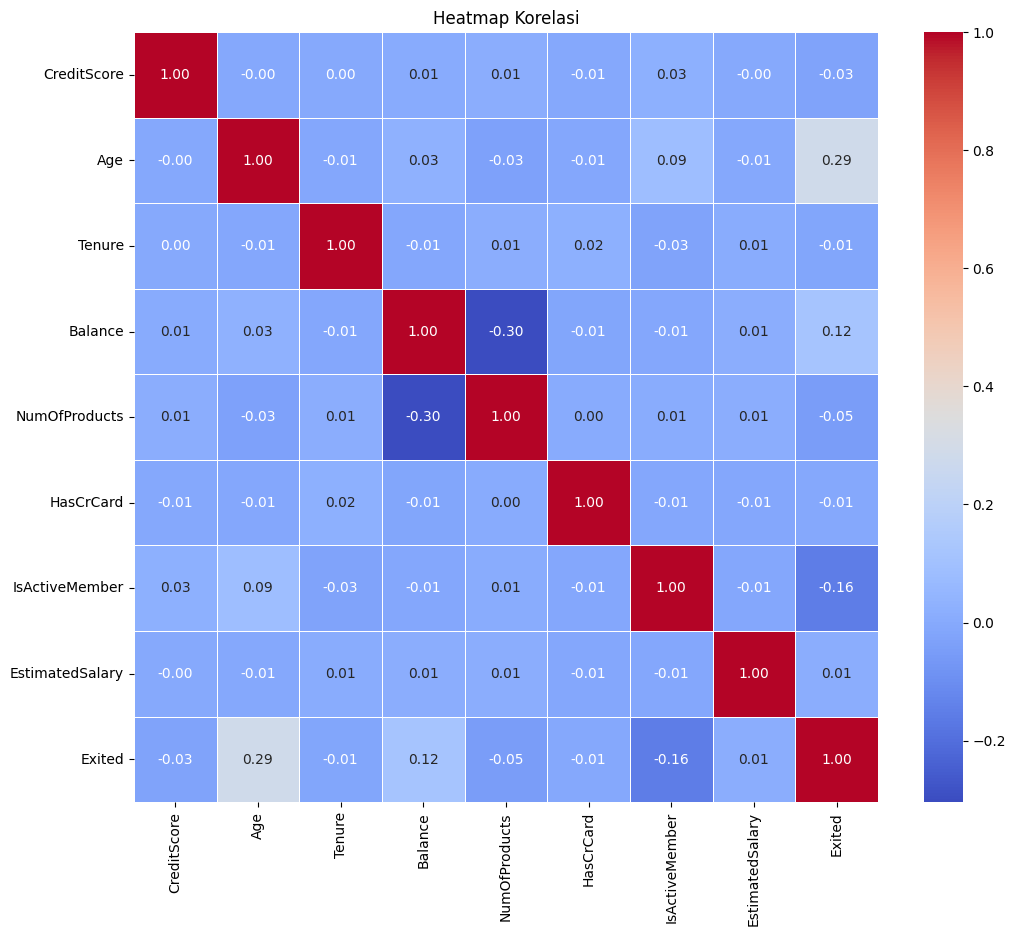

In [10]:
correlation_matrix = num_features.corr()

# print(correlation_matrix)

plt.figure(figsize=(12,10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

### Pairplot untuk fitur numerik

<Figure size 1400x1400 with 0 Axes>

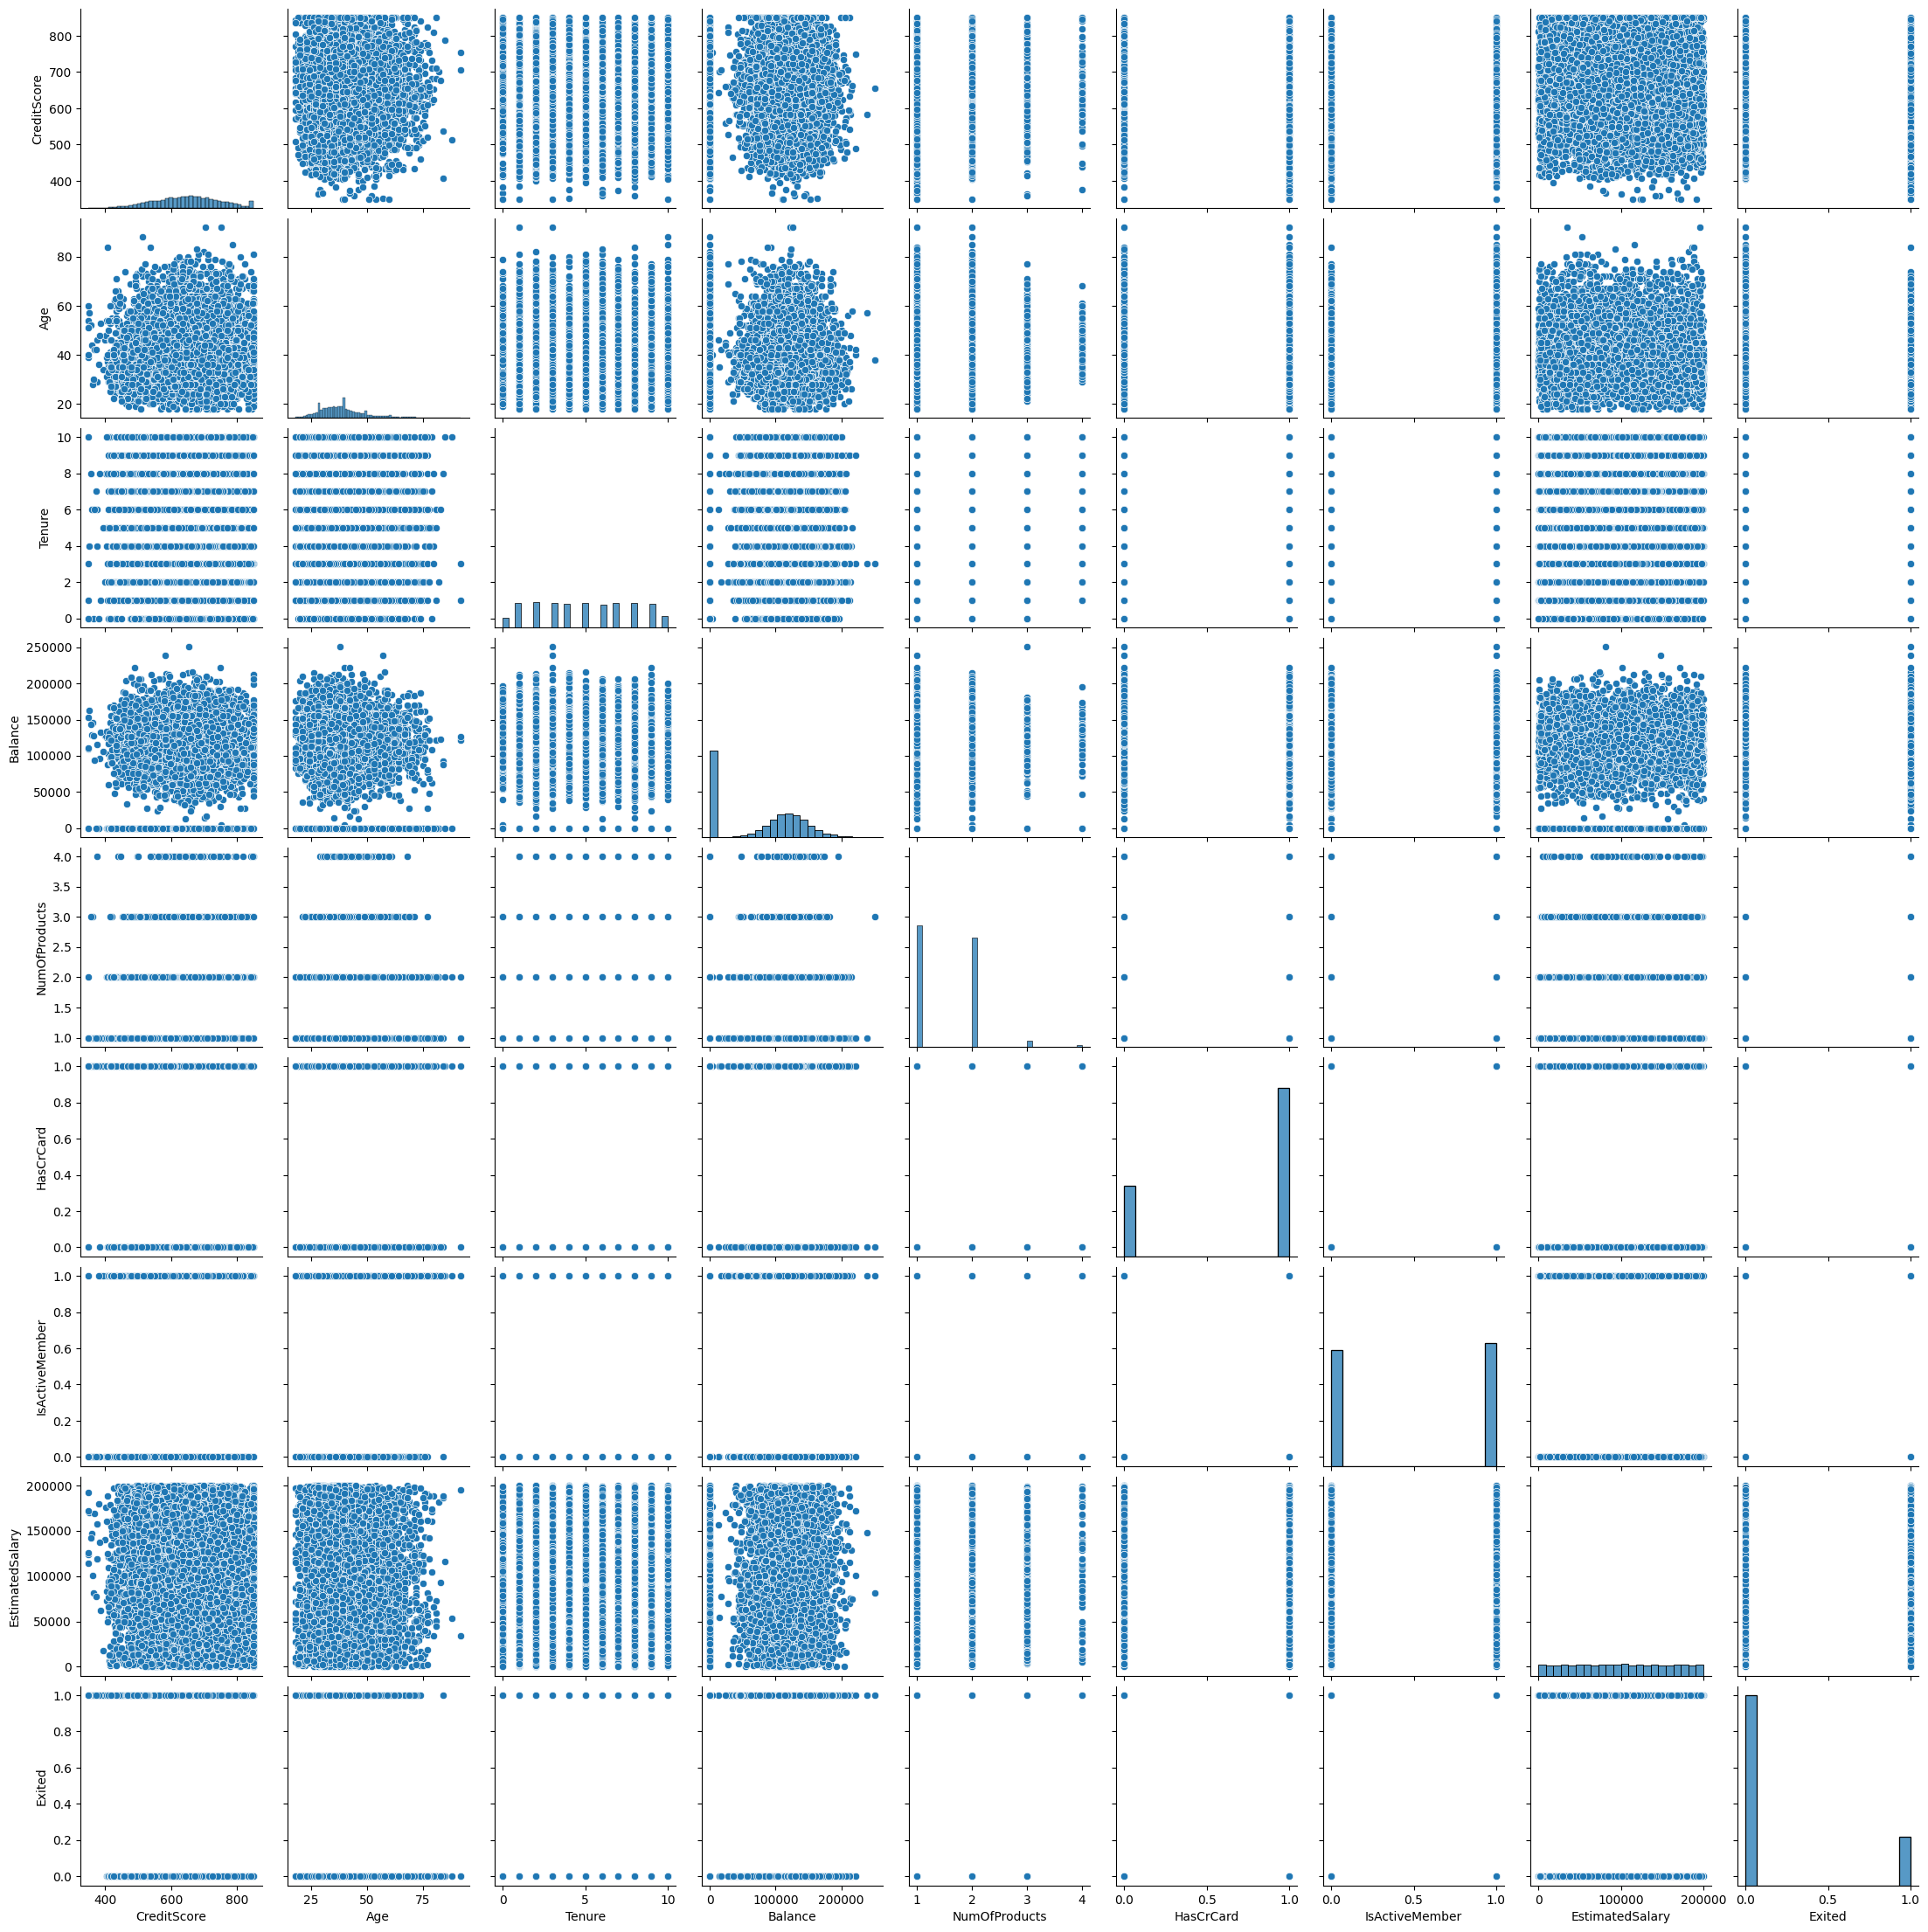

In [11]:
plt.figure(figsize=(14,14))
sns.pairplot(num_features)
plt.show()

### Visualisasi distribusi variabel target

/tmp/ipykernel_7942/4269925694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Exited'],palette='viridis')


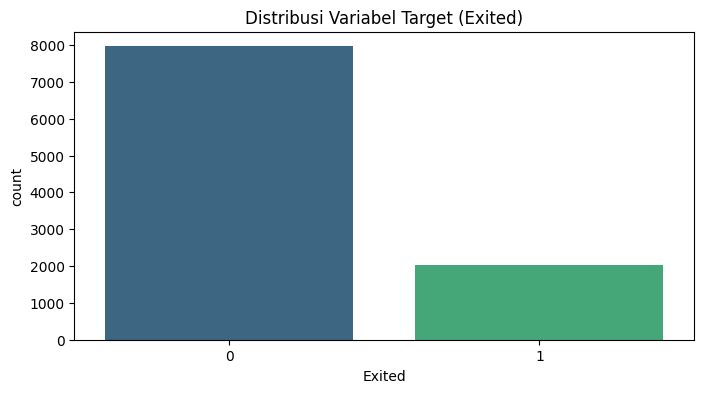

In [12]:
plt.figure(figsize=(8,4))

sns.countplot(x=data['Exited'],palette='viridis')
plt.title('Distribusi Variabel Target (Exited)')
plt.show()

## Langkah 4: Label Encoder

In [13]:
label_encoder = LabelEncoder()

cat_columns = data.select_dtypes(include=['object']).columns

# print(cat_columns)

# for i in cat_columns:
#     print(i)

for column in cat_columns:
    data[column] = label_encoder.fit_transform(data[column])

data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1337,710,1,0,30,10,133537.10,2,1,0,155593.74,0
7686,718,0,1,48,9,0.00,2,1,1,72105.63,0
3172,665,1,1,32,1,132178.67,1,0,0,11865.76,0
7588,579,2,1,33,1,0.00,2,1,1,54816.57,0
833,634,1,1,37,3,111432.77,2,1,1,167032.49,0
9623,573,0,0,47,8,154543.98,1,1,0,29586.73,0
597,646,1,1,39,9,111574.41,1,1,1,30838.51,0
4273,562,0,1,75,5,87140.85,1,1,1,39351.64,0
2232,649,2,1,36,8,0.00,2,1,0,161668.15,0
9323,644,0,1,50,9,76817.00,4,1,0,196371.13,1


## Langkah 5: Data Splitting

In [14]:
scaler = MinMaxScaler()

num_columns = data.select_dtypes(include=[np.number]).columns

print(num_columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  float64
 2   Gender           10000 non-null  float64
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  float64
dtypes: float64(11)
memory usage: 859.5 KB


In [20]:
data[num_columns] = scaler.fit_transform(data[num_columns])

X = data.drop(columns=['Exited'])
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(8000, 10), y_train=(8000,)
Test set shape: X_test=(2000, 10), y_test=(2000,)


## Langkah 6: Pelatihan Model 

In [21]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai")

Model training selesai


## Langkah 7: Evaluasi Model

In [22]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'confusion_matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

    return results


results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)

summary_df


,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),0.8240,0.595349,0.325700,0.421053
1,Decision Tree (DT),0.7810,0.450549,0.521628,0.483491
2,Random Forest (RF),0.8680,0.765432,0.473282,0.584906
3,Support Vector Machine (SVM),0.8530,0.827815,0.318066,0.459559
4,Naive Bayes (NB),0.8285,0.681159,0.239186,0.354049


In [30]:
results['K-Nearest Neighbors (KNN)']['confusion_matrix']

array([[1520,   87],
       [ 265,  128]])

In [32]:
for model in results:
    print(results[model]['confusion_matrix'])

[[1520   87]
 [ 265  128]]
[[1357  250]
 [ 188  205]]
[[1550   57]
 [ 207  186]]
[[1581   26]
 [ 268  125]]
[[1563   44]
 [ 299   94]]


In [36]:
def show_evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm_knn = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm_knn.ravel()
    print("==== KNN Classifier ====")
    print("Confusion Matrix:")
    print(cm_knn)
    print(f"True Positive (TP): {tp}")
    print(f"False Positive (FP): {fp}")
    print(f"False Negative (FN): {fn}")
    print(f"True Negative (TN): {tn}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print("\n" + "-"*40 + "\n")

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    

==== KNN Classifier ====
Confusion Matrix:
[[1520   87]
 [ 265  128]]
True Positive (TP): 128
False Positive (FP): 87
False Negative (FN): 265
True Negative (TN): 1520
Accuracy: 0.8240
Precision: 0.5953
Recall: 0.3257
F1-Score: 0.4211

----------------------------------------



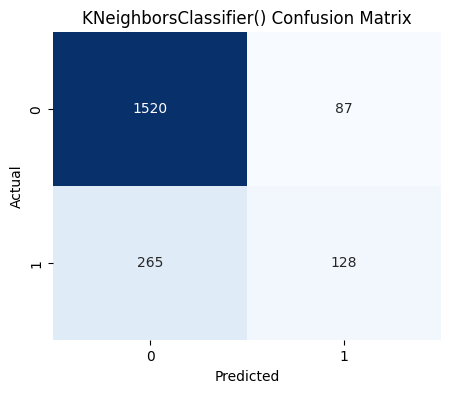

==== KNN Classifier ====
Confusion Matrix:
[[1357  250]
 [ 188  205]]
True Positive (TP): 205
False Positive (FP): 250
False Negative (FN): 188
True Negative (TN): 1357
Accuracy: 0.7810
Precision: 0.4505
Recall: 0.5216
F1-Score: 0.4835

----------------------------------------



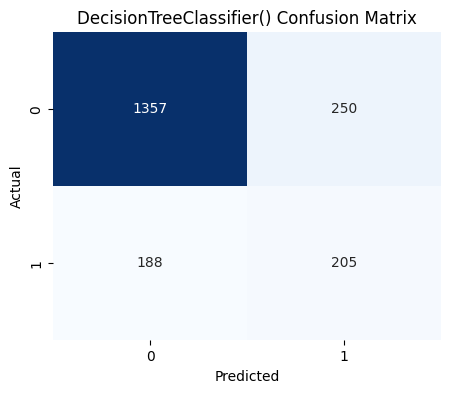

==== KNN Classifier ====
Confusion Matrix:
[[1550   57]
 [ 207  186]]
True Positive (TP): 186
False Positive (FP): 57
False Negative (FN): 207
True Negative (TN): 1550
Accuracy: 0.8680
Precision: 0.7654
Recall: 0.4733
F1-Score: 0.5849

----------------------------------------



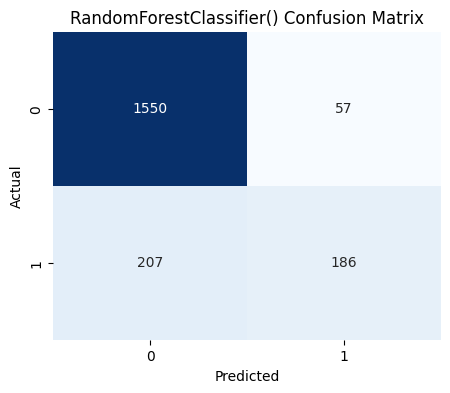

==== KNN Classifier ====
Confusion Matrix:
[[1581   26]
 [ 268  125]]
True Positive (TP): 125
False Positive (FP): 26
False Negative (FN): 268
True Negative (TN): 1581
Accuracy: 0.8530
Precision: 0.8278
Recall: 0.3181
F1-Score: 0.4596

----------------------------------------



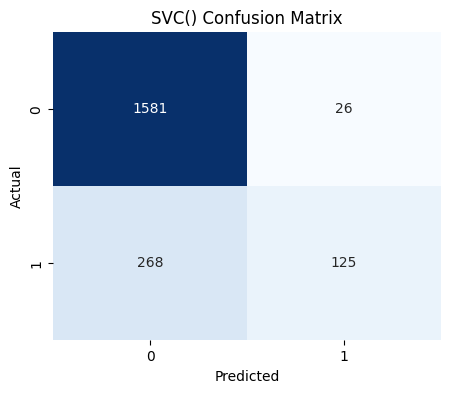

==== KNN Classifier ====
Confusion Matrix:
[[1563   44]
 [ 299   94]]
True Positive (TP): 94
False Positive (FP): 44
False Negative (FN): 299
True Negative (TN): 1563
Accuracy: 0.8285
Precision: 0.6812
Recall: 0.2392
F1-Score: 0.3540

----------------------------------------



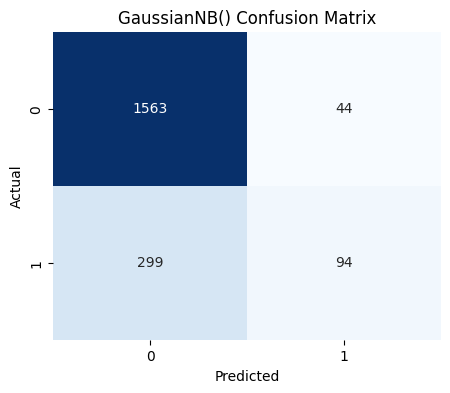

In [37]:
models = [knn, dt, rf, svm, nb]

for model in models:
    show_evaluate(model, X_test, y_test)

## Analisis Hasil Evaluasi Model

Berdasarkan data evaluasi yang diperbarui, berikut adalah analisis untuk masing-masing model dengan mempertimbangkan metrik Accuracy, Precision, Recall, dan F1-Score:

### **Analisis Hasil Evaluasi Model**

1. **K-Nearest Neighbors (KNN)**
   - **Accuracy**: 82.40%
   - **Precision**: 59.53%
   - **Recall**: 32.57%
   - **F1-Score**: 42.11%

   **Analisis**: KNN memiliki akurasi yang baik (82.40%). Precision-nya (59.53%) menunjukkan bahwa model cukup baik dalam mengidentifikasi kasus positif yang sebenarnya. Namun, recall-nya (32.57%) menunjukkan bahwa model ini kurang efektif dalam menangkap semua kasus positif yang ada. F1-Score 42.11% mencerminkan trade-off antara precision dan recall.

2. **Decision Tree (DT)**
   - **Accuracy**: 78.50%
   - **Precision**: 45.93%
   - **Recall**: 53.18%
   - **F1-Score**: 49.29%

   **Analisis**: Decision Tree memiliki akurasi yang sedikit lebih rendah (78.50%) dibandingkan KNN. Precision-nya (45.93%) lebih rendah daripada beberapa model lain, tetapi recall-nya (53.18%) lebih baik, menunjukkan bahwa model ini lebih efektif dalam menangkap kasus positif. F1-Score 49.29% menunjukkan performa yang seimbang antara precision dan recall.

3. **Random Forest (RF)**
   - **Accuracy**: 86.75%
   - **Precision**: 76.89%
   - **Recall**: 46.56%
   - **F1-Score**: 58.00%

   **Analisis**: Random Forest menunjukkan performa terbaik di antara semua model dengan akurasi tertinggi (86.75%). Precision-nya (76.89%) juga sangat baik, menunjukkan bahwa model ini sangat akurat dalam memprediksi kasus positif. Recall-nya (46.56%) masih perlu ditingkatkan, tetapi F1-Score 58.00% menunjukkan trade-off yang baik antara precision dan recall.

4. **Support Vector Machine (SVM)**
   - **Accuracy**: 85.30%
   - **Precision**: 82.78%
   - **Recall**: 31.81%
   - **F1-Score**: 45.96%

   **Analisis**: SVM memiliki akurasi yang tinggi (85.30%) dan precision yang sangat baik (82.78%). Namun, recall-nya yang rendah (31.81%) menunjukkan bahwa model ini cenderung melewatkan banyak kasus positif. F1-Score 45.96% mencerminkan trade-off antara precision yang tinggi dan recall yang rendah.

5. **Naive Bayes (NB)**
   - **Accuracy**: 82.85%
   - **Precision**: 68.12%
   - **Recall**: 23.92%
   - **F1-Score**: 35.40%

   **Analisis**: Naive Bayes memiliki akurasi yang kompetitif (82.85%) dan precision yang cukup baik (68.12%). Namun, recall-nya yang rendah (23.92%) menunjukkan bahwa model ini kurang efektif dalam menangkap kasus positif. F1-Score 35.40% menunjukkan bahwa model ini cenderung memberikan hasil yang lebih baik dalam hal precision tetapi kurang baik dalam hal recall.

### **Kesimpulan:**
- **Random Forest** adalah model dengan **akurasi tertinggi** (86.75%) dan **precision yang sangat baik** (76.89%). Meskipun recall-nya tidak setinggi model lain, F1-Score-nya yang tertinggi (58.00%) menunjukkan keseimbangan yang baik antara precision dan recall. Ini menjadikannya pilihan yang sangat baik untuk banyak aplikasi.

- **SVM** menunjukkan **precision yang sangat tinggi** (82.78%) tetapi dengan **recall yang sangat rendah** (31.81%), yang berarti model ini lebih selektif dalam mengidentifikasi kasus positif.

- **Decision Tree** memberikan performa yang seimbang dengan **recall yang lebih tinggi** (53.18%) dibandingkan dengan beberapa model lain, tetapi dengan akurasi dan precision yang lebih rendah.

- **KNN** memiliki performa yang baik secara keseluruhan tetapi memiliki trade-off antara precision dan recall yang harus dipertimbangkan.

- **Naive Bayes** memiliki precision yang baik tetapi recall yang rendah, membuatnya kurang ideal jika menangkap semua kasus positif sangat penting.

**Rekomendasi**: Jika tujuan utama adalah akurasi dan precision, **Random Forest** adalah pilihan terbaik. Jika recall sangat penting, maka model seperti **Decision Tree** bisa dipertimbangkan lebih lanjut.